# Import Modules and Path to Utilities

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import math
from os.path import abspath
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams['text.latex.unicode']=False
from pysolar.solar import *
import datetime
from operator import add
import pickle
from sklearn.impute import SimpleImputer as Imputer
from osgeo import gdal
import richdem as rd

imp = Imputer(strategy='mean')

# --------------------- #
# Lets Rips Some Treads #
# --------------------- #

from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()


if abspath('../utils/') not in sys.path:
    sys.path.append(abspath('../utils/'))
from utils import GetExtent

### Define file path to files

In [4]:
# from config import site_name
SITENAME = 'tuolumne'
YEAR = '2013'
path_to_data = '../data/{0}/'.format(YEAR)
files = os.listdir('../data/{0}'.format(YEAR))

In [5]:
data = {}
ext = {}
for f in files: 
    print('Loading: {0}'.format(f))
    llave = f.split('_')[0]
    ds = gdal.Open(
            os.path.join(
                path_to_data, f
            ), gdal.GA_ReadOnly
        )
    rb = ds.GetRasterBand(1)
    data[llave] = rb.ReadAsArray()
    data[llave] = np.where(data[llave]==None, np.nan, data[llave])
    data[llave] = np.divide(data[llave],100)
    gt=ds.GetGeoTransform()
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    ext[llave] = GetExtent(gt,cols,rows)
    
    


Loading {0} 20130403_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0
Loading {0} 20130525_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0
Loading {0} 20130601_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0
Loading {0} 20130608_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0
Loading {0} 20130503_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0
Loading {0} 20130429_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0


Unable to Plot: 20130403


/Users/joel.gongora/anaconda3/envs/deepsnow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Unable to Plot: 20130429
Unable to Plot: 20130503
Unable to Plot: 20130525
Unable to Plot: 20130601
Unable to Plot: 20130608


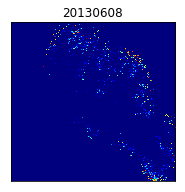

In [33]:
ix = 1
llaves = list(np.sort(list(data.keys())))
plt.figure(figsize=(10,18))
for llave in llaves:
    ax = plt.subplot(3,3,ix)
    try:
        cmap = 'jet'

        im = ax.imshow(
            data[llave],
            extent=[
                ext[llave][0][0] - 3,
                ext[llave][2][0] - 3,
                ext[llave][1][1] - 3,
                ext[llave][0][1] - 3
            ],
            cmap=cmap
        )
        plt.title(llave)
        if ix < 11:
            plt.gca().axes.get_yaxis().set_visible(False)
            plt.gca().axes.get_xaxis().set_visible(False)
        else:
            plt.xlabel('UTME')
            plt.ylabel('UTMN')
        cbar = plt.colorbar()
        plt.subplots_adjust(left=None, bottom=None, right=None, wspace=None, hspace=0.25)
        ix = ix + 1
    except:
        print('Unable to Plot: {0}'.format(llave))